In [4]:
%load_ext autoreload
%autoreload 2

import time
import os
import numpy as np
import pandas as pd

from src import FEATURE_DIR, RESULT_DIR
from src.utils import DIS, MCC, conf_mat, create_dir
from src.config import fold_split

from sklearn.ensemble import RandomForestClassifier


TRN_FEAT_DIR = os.path.join(FEATURE_DIR, 'warp', 'training')

fold = 1
split = 1


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# Splitting folds
trn_objs = fold_split[fold][split]['training']
val_objs = fold_split[fold][split]['validation']

train_data = pd.concat({i: pd.read_csv(
                    os.path.join(TRN_FEAT_DIR,
                                'features_fold{0:02d}.csv'.format(i)))
                for i in range(1, 10) if i in trn_objs
            }, axis=0).reset_index(drop=True)


In [8]:
val_data = pd.concat({i: pd.read_csv(
                    os.path.join(TRN_FEAT_DIR,
                                'features_fold{0:02d}.csv'.format(i)))
                for i in range(1, 10) if i in val_objs
            }, axis=0).reset_index(drop=True)

In [10]:
X_train = train_data.iloc[:, :512]
y_train = train_data['y']

In [16]:
rnd_clf = RandomForestClassifier(n_estimators=150,
                                 max_depth=150,
                                 random_state=71,
                                 n_jobs=-1,
                                 oob_score=True)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=150, n_estimators=150, n_jobs=-1,
                       oob_score=True, random_state=71)

In [20]:
for num_split in range(1,9):

    # Splitting folds
    train_feat = pd.concat([feat[k] for k in fold_split[num_fold][num_split]['training']], axis=0).reset_index(drop=True)
    val_feat   = pd.concat([feat[k] for k in fold_split[num_fold][num_split]['validation']], axis=0).reset_index(drop=True)

    X_train = train_feat.iloc[:,:512]
    y_train = train_feat.loc[:,'y']
    X_val   = val_feat.iloc[:,:512]
    y_val   = val_feat.loc[:,'y']

    p_val   = val_feat.loc[:,'pixel'].values.astype(int)

    # Random forest classifier
    rnd_clf =  RandomForestClassifier(n_estimators = 150, max_depth = 100, random_state = 123, n_jobs=-1, oob_score=True)
    rnd_clf.fit(X_train, y_train)
    pred  = rnd_clf.predict_proba(X_val)[:,1]

    y_pred = (pred > .3).astype(int)

    # Metrics
    tn, fp, fn, tp =  metrics.confusion_matrix(y_val.values, y_pred).ravel()

    dis = DIS(tn, fp, fn, tp)
    mcc = MCC(tn, fp, fn, tp)
    print(dis,mcc)

0.09116040724063973 0.8757269090344999
0.1283304618503325 0.8441780605382391
0.32574002167695737 0.617477845210631
0.0966692465910253 0.872603652413314
0.14809798423748413 0.79083891425181
0.22089539771236114 0.7236824017270896
0.0813376432542356 0.8885759674073364
0.30639533084905785 0.6234496750417454


In [25]:
feat[1].columns

KeyError: 1

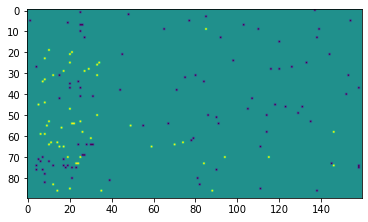

In [27]:
import matplotlib.pyplot as plt
z = np.zeros((14400,1))
z[p_val[:144],0] = (2*y_pred[:144])-1

plt.imshow(z.reshape((90,160)))

In [282]:
y_pred.shape[0]/144

1702.7847222222222

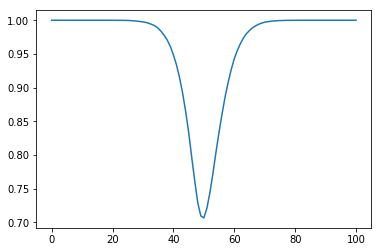

In [296]:
res_dis = []
res_mcc = []

for i in range(101):
    y_pred = (pred > i/100).astype(int)

    # Metrics
    tn, fp, fn, tp =  metrics.confusion_matrix(y_val.values, y_pred).ravel()

    dis = DIS(tn, fp, fn, tp)
    mcc = MCC(tn, fp, fn, tp)
    res_dis.append(dis)
    res_mcc.append(mcc)

#plt.plot(res_dis)
plt.plot(res_dis)

In [269]:
#for i in range(9):
#    t = pd.read_csv('/home/luiz.tavares/proc/features_vdao/validation_feat_fold{0:02d}.csv'.format(i)) 
#    print(t['object'].unique())

In [17]:
# Training with OMP
from sklearn.linear_model import OrthogonalMatchingPursuit

reg  = OrthogonalMatchingPursuit().fit(X_train ,y_train)
pred   = X_val @ reg.coef_
y_pred = (pred > 0).astype(int)


In [18]:
tn, fp, fn, tp =  metrics.confusion_matrix(y_val.values, y_pred).ravel()
dis = DIS(tn, fp, fn, tp)
mcc = MCC(tn, fp, fn, tp)

print(dis, mcc)

0.7014001093325838 0.2723940391831474


In [8]:
# Teste com outra RF
num_split=1

# Splitting fol
train_feat = pd.concat([feat[k] for k in fold_split[num_fold][num_split]['training']], axis=0).reset_index(drop=True)
val_feat   = pd.concat([feat[k] for k in fold_split[num_fold][num_split]['validation']], axis=0).reset_index(drop=True)

X_train = train_feat.iloc[:,:512]
y_train = train_feat.loc[:,'y']
X_val   = val_feat.iloc[:,:512]
y_val   = val_feat.loc[:,'y']
    
    


In [10]:
import pickle
import sklearn

with open('/home/luiz.tavares/Workspace/backup_VDAO/results/opt_RF/MCC/mod_mcc/trees/validationRF_fold00_split00.pkl', 'rb') as f:
    rf = pickle.load(f)
    
pred  = rf.predict_proba(X_val)[:,1]
y_pred = (pred > .3).astype(int)

# Metrics
tn, fp, fn, tp =  metrics.confusion_matrix(y_val.values, y_pred).ravel()

dis = DIS(tn, fp, fn, tp)
mcc = MCC(tn, fp, fn, tp)
print(dis,mcc)

0.9997227477994013 0.0002446619436223601
